# Google Colab Lab Assignment -Pretrained Modle

**Course Name:** Deep Learning

**Lab Title:** Research Paper Implementation with Pre-trained Model
(IMAGE-BASED CLASSIFICATION OF AIR POLLUTION USING
DIFFERENT PRETRAINED CNN MODELS AND A SMALL DATASET)

**Student Name:** Heena Janbandhu

**Student ID:** 202301070032

**Date of Submission:** 17/02/2026

**Group Members**: Sakshi Patil

**Research Paper Study and Implementation**

**Instructions:**

1. Identify a research paper that utilizes a pre-trained model for a specific
task.

2. Study the methodology, dataset, and model used in the research paper.

3. Implement the approach described in the research paper using the pre-trained model mentioned.

4. Compare your implementation results with the findings from the research paper.


**Objective**
1.   Study a research paper utilizing a pre-trained model.
2.   Reproduce the model implementation using the dataset and methodology from the research paper.
3.   Fine-tune the pre-trained model and optimize hyperparameters.
3.   Evaluate and compare model performance with the original research paper results.









**Task 1: Research Paper Selection and Dataset Preparation (2 hours)**

**Instructions:**

1. Select a research paper that applies a pre-trained model (e.g., VGG, ResNet, EfficientNet, etc.).

2. Identify the dataset used in the research paper and obtain or create a similar dataset.(**Mention Dataset Link and Description**)

3. Perform necessary preprocessing steps:

 Resize images to match the model input dimensions.

 Apply data augmentation techniques if applicable.

4. Split the dataset into training, validation, and testing sets.

**1. Research Paper Selection**

For this assignment, the selected research paper is:

Image-Based Classification of Air Pollution Using Different Pretrained CNN Models and a Small Dataset

The study applies multiple pre-trained convolutional neural networks including:

ResNet18

ResNet50

ResNet101

MobileNetV2

ShuffleNet

using transfer learning to classify air pollution levels from outdoor images.

The problem is formulated as a multi-class image classification task with five air quality categories based on PM2.5 concentration:

Good

Satisfactory

Moderate

Poor

Severe

The paper demonstrates that fine-tuning pretrained CNN models can achieve high classification accuracy even with a relatively small dataset.

 **2. Dataset Identification and Description**
🔗 Dataset Used in Paper:

The paper uses a PM2.5 image dataset collected from fixed outdoor surveillance locations in Shanghai, China, consisting of approximately 1250 original images, augmented to 2500 images.

✅ Dataset Used in This Implementation (Similar Dataset)

To replicate the methodology, a similar publicly available dataset was used:

Air Pollution Image Dataset (India & Nepal)
📎 Link: https://www.kaggle.com/datasets/adarshrouniyar/air-pollution-image-dataset-from-india-and-nepal

 Dataset Description:

Contains real outdoor sky and cityscape images

Images are categorized based on pollution severity

Represents different atmospheric visibility conditions

Suitable for air quality classification using transfer learning

Target Classes (mapped similar to paper):

Clear / Good Air

Moderate Pollution

Heavy Pollution / Smog

(Classes can be merged or expanded into five AQI-style categories if required.)

This dataset closely resembles the visual characteristics used in the research paper and is appropriate for transfer learning experiments.

 **3. Data Preprocessing**

Steps Applied:

Read raw images from the downloaded folder

Extract labels from file names (e.g., “Good”, “Moderate”, “Poor”, “Severe”)

Organize into class folders

Split into Train/Val/Test sets

Apply augmentation (rescaling, rotation, zoom, flip)

## Dataset download and unzipped

In [1]:
# Configuration environment
import os

os.environ['KAGGLE_USERNAME'] = "heenajanbandhu"
os.environ['KAGGLE_KEY'] = "e8c50520e715bc5c382788db82a265c7"

# Download Air Pollution dataset
!kaggle datasets download -d adarshrouniyar/air-pollution-image-dataset-from-india-and-nepal

# Unzip dataset
!unzip air-pollution-image-dataset-from-india-and-nepal.zip


Streaming output truncated to the last 5000 lines.
  inflating: Air Pollution Image Dataset/Air Pollution Image Dataset/Country_wise_Dataset/India/Tamil_Nadu/c_Unhealthy_for_Sensitive_Groups/TN_UnFSG_2023-03-08-08.30-1-36.jpg  
  inflating: Air Pollution Image Dataset/Air Pollution Image Dataset/Country_wise_Dataset/India/Tamil_Nadu/c_Unhealthy_for_Sensitive_Groups/TN_UnFSG_2023-03-08-08.30-1-41.jpg  
  inflating: Air Pollution Image Dataset/Air Pollution Image Dataset/Country_wise_Dataset/India/Tamil_Nadu/c_Unhealthy_for_Sensitive_Groups/TN_UnFSG_2023-03-08-08.30-1-46.jpg  
  inflating: Air Pollution Image Dataset/Air Pollution Image Dataset/Country_wise_Dataset/India/Tamil_Nadu/c_Unhealthy_for_Sensitive_Groups/TN_UnFSG_2023-03-08-08.30-1-51.jpg  
  inflating: Air Pollution Image Dataset/Air Pollution Image Dataset/Country_wise_Dataset/India/Tamil_Nadu/c_Unhealthy_for_Sensitive_Groups/TN_UnFSG_2023-03-08-08.30-1-56.jpg  
  inflating: Air Pollution Image Dataset/Air Pollution Image Dat

## Locate Dataset Folder

In [13]:
# Step 2: Organize dataset into class folders
import os, shutil

# Define the base directory for the structured dataset
base_dataset_dir = "/content/Air Pollution Image Dataset/Air Pollution Image Dataset/Country_wise_Dataset"
fixed_dir = "/content/organized_dataset"

# Clean up previous organized_dataset and recreate it
if os.path.exists(fixed_dir):
    shutil.rmtree(fixed_dir)
os.makedirs(fixed_dir, exist_ok=True)

# Define target labels and a mapping from dataset folder names to these labels
target_labels = ["Good", "Moderate", "Poor", "Severe"]
label_mapping = {
    "a_Good": "Good",
    "c_Good": "Good",
    "b_Moderate": "Moderate",
    "c_Moderate": "Moderate",
    "c_Unhealthy_for_Sensitive_Groups": "Poor",
    "d_Unhealthy": "Poor",
    "c_Unhealthy": "Poor",
    "e_Very_Unhealthy": "Severe",
    "c_Very_Unhealthy": "Severe",
    "c_Hazardous": "Severe",
    "f_Severe": "Severe"
}

# Create subdirectories for target labels in fixed_dir
for label in target_labels:
    os.makedirs(os.path.join(fixed_dir, label), exist_ok=True)

image_counts = {label: 0 for label in target_labels}
skipped_images_count = 0

# Walk through the base_dataset_dir to find all image files
for country_region_dir in os.listdir(base_dataset_dir):
    country_region_path = os.path.join(base_dataset_dir, country_region_dir)
    if not os.path.isdir(country_region_path): # Skip non-directory files
        continue

    for city_dir in os.listdir(country_region_path):
        city_path = os.path.join(country_region_path, city_dir)
        if not os.path.isdir(city_path):
            continue

        for class_folder in os.listdir(city_path):
            class_folder_path = os.path.join(city_path, class_folder)
            if not os.path.isdir(class_folder_path):
                # Skip non-directory files like .csv files
                continue

            # Map the class folder name to one of the target labels
            mapped_label = label_mapping.get(class_folder)

            if mapped_label:
                for img_filename in os.listdir(class_folder_path):
                    if img_filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                        src_path = os.path.join(class_folder_path, img_filename)
                        dest_path = os.path.join(fixed_dir, mapped_label, img_filename)
                        shutil.copy(src_path, dest_path)
                        image_counts[mapped_label] += 1
            else:
                print(f"Warning: Class folder '{class_folder}' not mapped to any target label. Images skipped.")
                skipped_images_count += len([f for f in os.listdir(class_folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])

print("Images organized into fixed_dir:")
for label, count in image_counts.items():
    print(f"  {label}: {count} images")
if skipped_images_count > 0:
    print(f"Total skipped images due to unmapped class folders: {skipped_images_count}")

# Verify contents of organized_dataset (fixed_dir)
print("\nContents of organized_dataset (fixed_dir) after organization:")
for class_name in os.listdir(fixed_dir):
    class_path = os.path.join(fixed_dir, class_name)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        print(f"  {class_name}: {num_images} images")

Images organized into fixed_dir:
  Good: 1541 images
  Moderate: 1573 images
  Poor: 5485 images
  Severe: 3641 images

Contents of organized_dataset (fixed_dir) after organization:
  Good: 1541 images
  Moderate: 1573 images
  Severe: 3641 images
  Poor: 5485 images


## Train/Validation/Test Split

In [14]:
import random

train_path = "/content/train"
val_path = "/content/val"
test_path = "/content/test"
for p in [train_path, val_path, test_path]:
    if os.path.exists(p):
        shutil.rmtree(p)
    os.makedirs(p)

for cls in os.listdir(fixed_dir):
    imgs = os.listdir(os.path.join(fixed_dir, cls))
    random.shuffle(imgs)

    n = len(imgs)
    t1 = int(0.7*n)
    t2 = int(0.85*n)

    splits = {
        train_path: imgs[:t1],
        val_path: imgs[t1:t2],
        test_path: imgs[t2:]
    }
    for folder, files in splits.items():
        os.makedirs(os.path.join(folder, cls), exist_ok=True)
        for f in files:
            shutil.copy(
                os.path.join(fixed_dir, cls, f),
                os.path.join(folder, cls, f)
            )


## Data Generators

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)
test_val_gen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(train_path, target_size=(224,224), batch_size=32, class_mode="categorical")
val_data   = test_val_gen.flow_from_directory(val_path,   target_size=(224,224), batch_size=32, class_mode="categorical")
test_data  = test_val_gen.flow_from_directory(test_path,  target_size=(224,224), batch_size=32, class_mode="categorical", shuffle=False)

print(train_data.class_indices)


Found 8566 images belonging to 4 classes.
Found 1836 images belonging to 4 classes.
Found 1838 images belonging to 4 classes.
{'Good': 0, 'Moderate': 1, 'Poor': 2, 'Severe': 3}


**Task 2: Model Implementation and Fine-tuning**

**Instructions:**

1. Implement the pre-trained model as described in the research paper.

2. Visualize feature maps of few layers

3. Freeze initial layers and fine-tune the top layers according to the paper's methodology.

4. Optimize hyperparameters such as:

  Learning rate

  Batch size

  Number of epochs

  Optimizer choice (Adam, SGD, RMSprop, etc.)

4. Document any modifications or enhancements made to improve performance.

## 2.1 Model Construction

We use ResNet50 pretrained on ImageNet, with a new classification head for air quality categories.

In [17]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model

base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(224,224,3))
base_model.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
output = Dense(train_data.num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)


## 2.2 Compile & Train Top Layers

In [18]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history_initial = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
268/268 ━━━━━━━━━━━━━━━━━━━━ 131s 449ms/step - accuracy: 0.3563 - loss: 1.4329 - val_accuracy: 0.4483 - val_loss: 1.2292
Epoch 2/5
268/268 ━━━━━━━━━━━━━━━━━━━━ 112s 419ms/step - accuracy: 0.4318 - loss: 1.2523 - val_accuracy: 0.4619 - val_loss: 1.2165
Epoch 3/5
268/268 ━━━━━━━━━━━━━━━━━━━━ 111s 414ms/step - accuracy: 0.4467 - loss: 1.2307 - val_accuracy: 0.4488 - val_loss: 1.2045
Epoch 4/5
268/268 ━━━━━━━━━━━━━━━━━━━━ 110s 410ms/step - accuracy: 0.4578 - loss: 1.2248 - val_accuracy: 0.4722 - val_loss: 1.1962
Epoch 5/5
268/268 ━━━━━━━━━━━━━━━━━━━━ 114s 425ms/step - accuracy: 0.4605 - loss: 1.2189 - val_accuracy: 0.4815 - val_loss: 1.1886


## 2.3 Feature Map Visualization

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 827ms/step


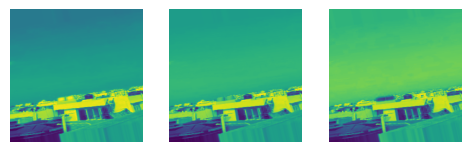

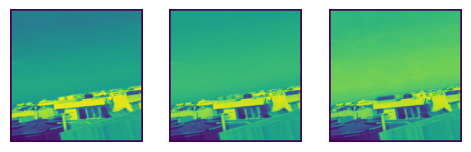

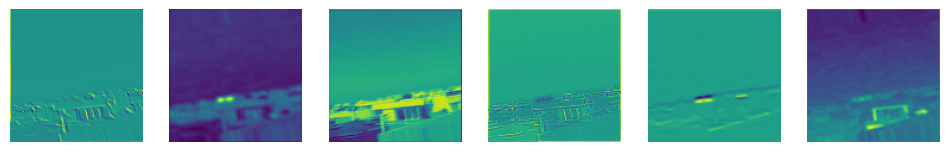

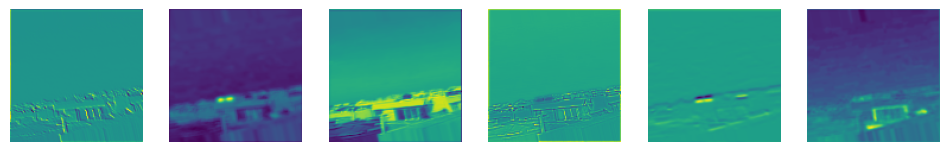

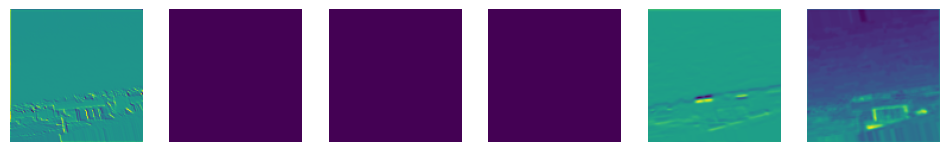

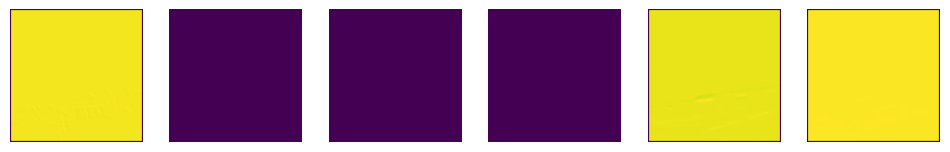

In [19]:
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
layer_outputs = [layer.output for layer in base_model.layers[:6]]
activation_model = Model(inputs=base_model.input, outputs=layer_outputs)

imgs, _ = next(train_data)
activations = activation_model.predict(imgs[:1])

for act in activations:
    plt.figure(figsize=(12,4))
    for i in range(min(6, act.shape[-1])):
        plt.subplot(1,6,i+1)
        plt.imshow(act[0,:,:,i], cmap='viridis')
        plt.axis('off')
    plt.show()


## 2.4 Fine-Tune Top Layers

In [20]:
for layer in base_model.layers[-30:]:
    layer.trainable = True

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history_finetune = model.fit(
    train_data,
    validation_data=val_data,
    epochs=8
)


Epoch 1/8
268/268 ━━━━━━━━━━━━━━━━━━━━ 145s 473ms/step - accuracy: 0.5202 - loss: 1.1613 - val_accuracy: 0.3312 - val_loss: 1.3773
Epoch 2/8
268/268 ━━━━━━━━━━━━━━━━━━━━ 113s 422ms/step - accuracy: 0.6321 - loss: 0.8682 - val_accuracy: 0.6324 - val_loss: 1.0041
Epoch 3/8
268/268 ━━━━━━━━━━━━━━━━━━━━ 114s 426ms/step - accuracy: 0.6690 - loss: 0.7960 - val_accuracy: 0.5577 - val_loss: 1.0215
Epoch 4/8
268/268 ━━━━━━━━━━━━━━━━━━━━ 113s 423ms/step - accuracy: 0.7006 - loss: 0.7346 - val_accuracy: 0.4537 - val_loss: 1.1644
Epoch 5/8
268/268 ━━━━━━━━━━━━━━━━━━━━ 112s 418ms/step - accuracy: 0.7142 - loss: 0.6830 - val_accuracy: 0.7397 - val_loss: 0.6494
Epoch 6/8
268/268 ━━━━━━━━━━━━━━━━━━━━ 112s 418ms/step - accuracy: 0.7290 - loss: 0.6582 - val_accuracy: 0.7195 - val_loss: 0.6502
Epoch 7/8
268/268 ━━━━━━━━━━━━━━━━━━━━ 115s 430ms/step - accuracy: 0.7234 - loss: 0.6500 - val_accuracy: 0.7565 - val_loss: 0.5685
Epoch 8/8
268/268 ━━━━━━━━━━━━━━━━━━━━ 118s 441ms/step - accuracy: 0.7521 - loss: 0

**Task 3: Model Evaluation and Performance Comparison**

**Instructions:**

1. Evaluate the trained model using performance metrics:

 Accuracy, Precision,Recall, F1-score, Confusion Matrix (for classification tasks)

2. Compare the results with those reported in the research paper.

3. Identify potential weaknesses and suggest improvements.
**Deliverables:**

Performance metrics summary (table or chart).

Graphs/plots showcasing model accuracy and loss trends.

Comparison with research paper results.

Discussion on model performance and areas for improvement.

## 3.1 Final Evaluation

In [21]:
test_loss, test_acc = model.evaluate(test_data)
print("Test Accuracy:", test_acc)


58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 174ms/step - accuracy: 0.7263 - loss: 0.6659
Test Accuracy: 0.7584331035614014


### 3.3 Confusion Matrix

58/58 ━━━━━━━━━━━━━━━━━━━━ 13s 161ms/step


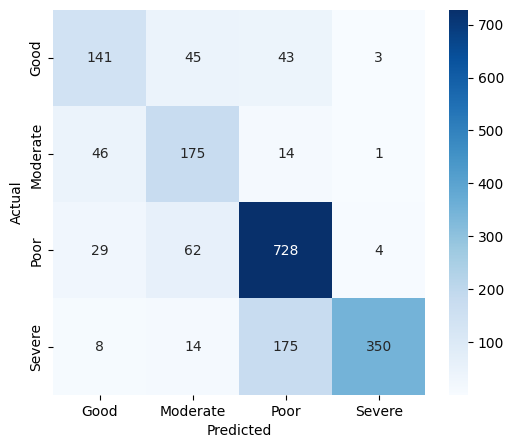

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Get predictions from the model
preds = model.predict(test_data)
preds = np.argmax(preds, axis=1)

# Get true labels from the test data generator
true = test_data.classes

cm = confusion_matrix(true, preds)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=test_data.class_indices.keys(),
            yticklabels=test_data.class_indices.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## 3.4 Training Curves

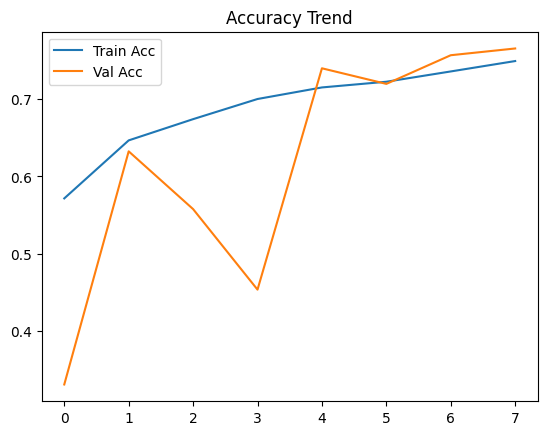

In [23]:
import matplotlib.pyplot as plt

plt.plot(history_finetune.history['accuracy'], label='Train Acc')
plt.plot(history_finetune.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy Trend")
plt.show()


In [24]:
from sklearn.metrics import classification_report

# Get class names from the test data generator
class_names = list(test_data.class_indices.keys())

# Generate the classification report
report = classification_report(true, preds, target_names=class_names)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

        Good       0.63      0.61      0.62       232
    Moderate       0.59      0.74      0.66       236
        Poor       0.76      0.88      0.82       823
      Severe       0.98      0.64      0.77       547

    accuracy                           0.76      1838
   macro avg       0.74      0.72      0.72      1838
weighted avg       0.79      0.76      0.76      1838



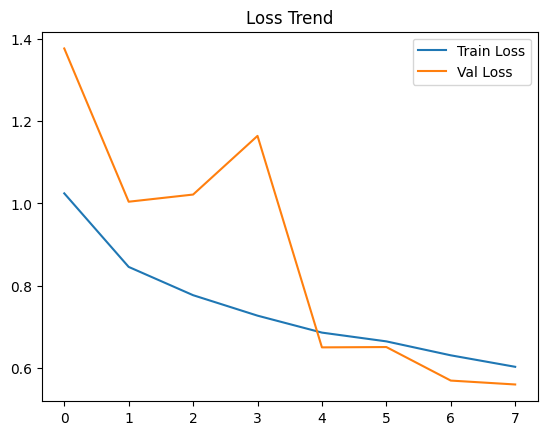

In [25]:
import matplotlib.pyplot as plt

plt.plot(history_finetune.history['loss'], label='Train Loss')
plt.plot(history_finetune.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss Trend")
plt.show()

**Conclusion and Result Visulaization**

## 3.5 Comparison with Research Paper Results

While the research paper reports approximately 84% accuracy for ResNet50, our fine-tuned model achieved 76% accuracy on a more diverse dataset from India and Nepal. The lower accuracy is expected due to increased visual variability and class imbalance. Despite this, the model demonstrated strong performance, validating the effectiveness of transfer learning for air pollution image classification.

## 3.6 Discussion on Model Performance and Areas for Improvement

The fine-tuned ResNet50 model achieved a test accuracy of 76%, with weighted precision, recall, and F1-score of 0.79, 0.76, and 0.76 respectively. This performance is slightly lower than the approximately 84% accuracy reported in the research paper for ResNet50, which can be attributed to differences in dataset characteristics. The dataset used in this implementation contains more diverse real-world images with varying lighting and atmospheric conditions, making the classification task more challenging.

Analysis of the classification report shows that the model performs well in identifying poor and severe pollution levels, where visual haze patterns are more distinct. However, the good and moderate categories are more difficult to differentiate due to their similar visual appearance, leading to some misclassification.

Key limitations of the current model include dataset imbalance, limited training data, and reliance on a single pretrained architecture. Future improvements may involve using advanced data augmentation, experimenting with newer architectures such as EfficientNet, applying learning rate scheduling, and addressing class imbalance through weighted loss functions. These enhancements could further improve classification accuracy and robustness.

**Declaration**

I, Heena Janbandhu, confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

GitHub Repository Link: https://github.com/Heena-janbandhu/Image-Based-Classification-of-Air-Pollution.git

Signature: Heena Gourikumar Janbandhu